# CS178 Final Project
For our final project, we will be using the Fashion MNIST dataset.

# Project Setup

Here, we will import the necessary libraries needed, with Tensorflow being the main library used for neural network construction. We then load the dataset, split it into training and testing segments, and plot the initial images.

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


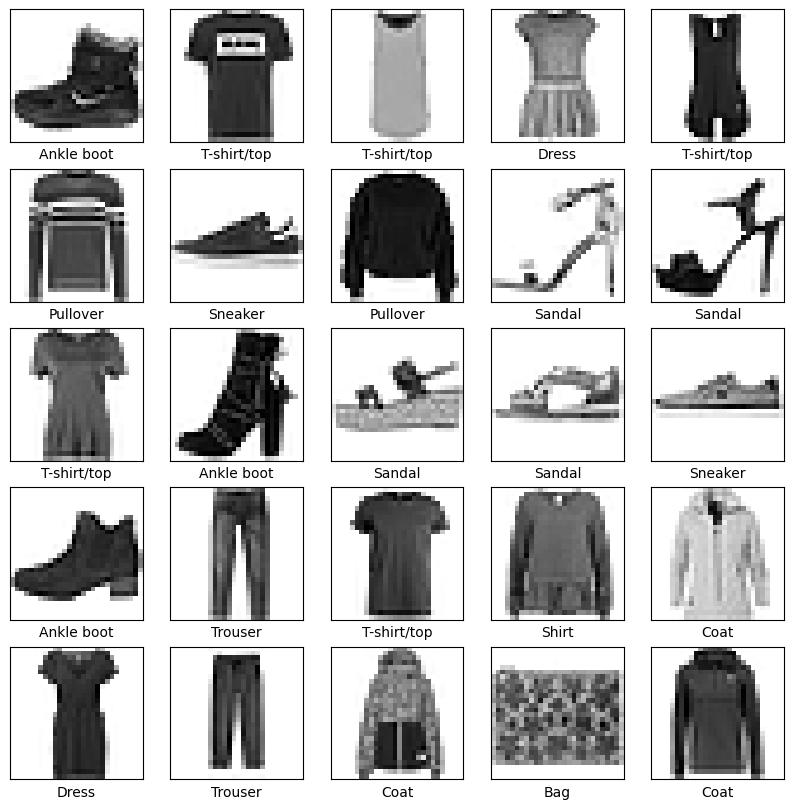

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd

!git clone https://github.com/zalandoresearch/fashion-mnist.git

# Split into training and testing sets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the first few images with their labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Build the Model

Here, we construct the actual model. We use TensorFlow Keras API in order to efficiently perform this task, defining a simple neural network with one hidden layer. We then compile the actual model.

In [12]:
# Building the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flattens images from 2D into 1D
    layers.Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Train the Model

In [13]:
# Training the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4978 - accuracy: 0.8243 - val_loss: 0.4251 - val_accuracy: 0.8509
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3711 - accuracy: 0.8667 - val_loss: 0.3714 - val_accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3347 - accuracy: 0.8785 - val_loss: 0.3636 - val_accuracy: 0.8726
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3111 - accuracy: 0.8857 - val_loss: 0.3489 - val_accuracy: 0.8766
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2931 - accuracy: 0.8923 - val_loss: 0.3501 - val_accuracy: 0.8731
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.8967 - val_loss: 0.3403 - val_accuracy: 0.8797
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2674 - accuracy: 0.9007 - val_loss: 0.3576 - val_accuracy:

## Evaluate the Model

In [14]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3366 - accuracy: 0.8814 - 246ms/epoch - 785us/step

Test accuracy: 0.8813999891281128


## Make Predictions

313/313 [==============================] - 0s 771us/step


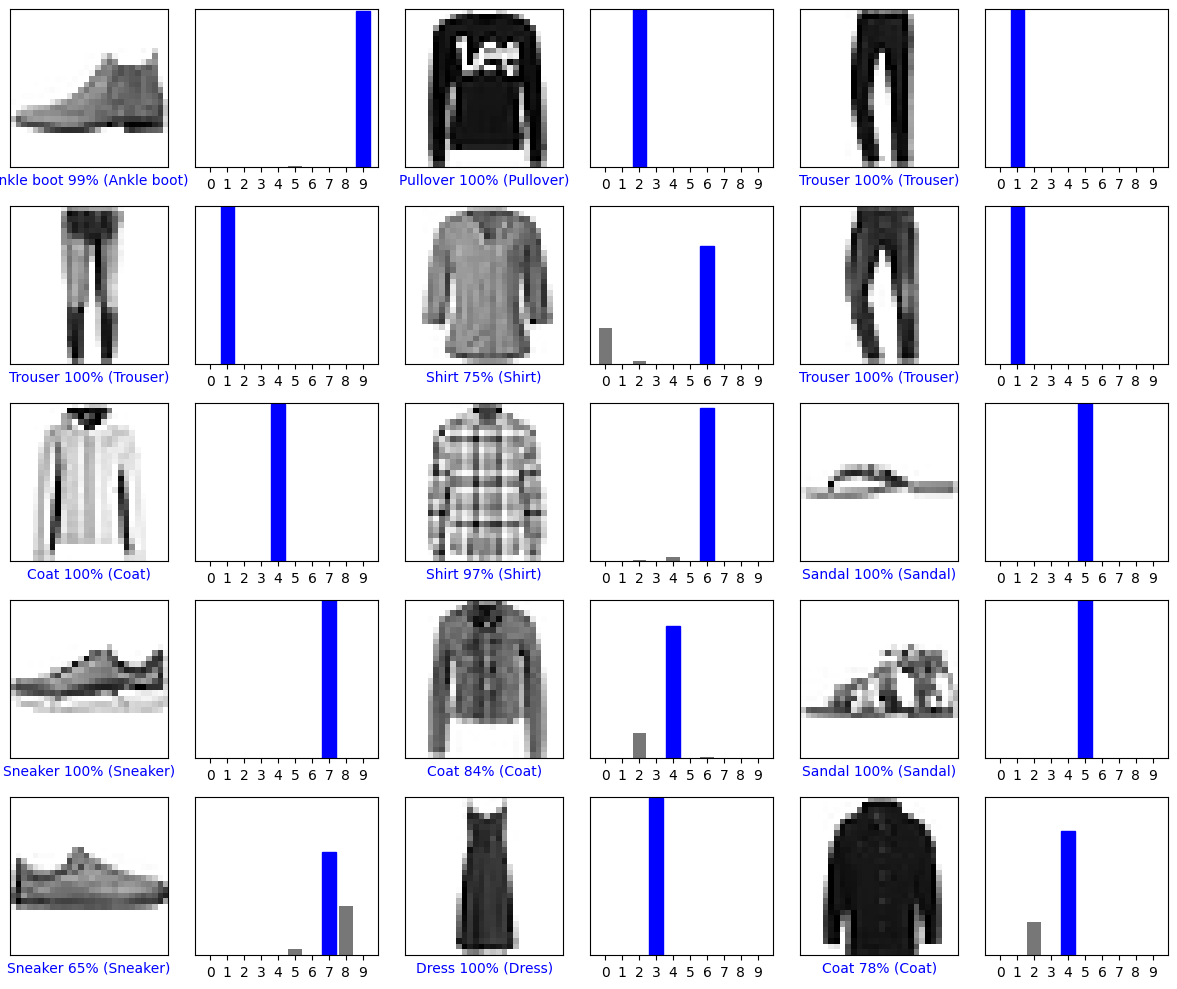

In [15]:
# Making predictions
probability_model = models.Sequential([model, 
                                       layers.Softmax()])
predictions = probability_model.predict(test_images)

# Function to plot the image, its true label, and the predicted label
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Function to plot the value array of predictions
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plotting the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
